# HK Model (unmodified)

## $d=1$

### 1. Density

In [6]:
from HKLnumerics import HK_1D, PlotFunctions

mu_U1 = HK_1D.create_mu_array(1000, 1)
mu_U4 = HK_1D.create_mu_array(1000, 4)
mu_U8 = HK_1D.create_mu_array(1000, 8)

rho_U1 = HK_1D.create_rho_array(mu_U1, 1)
rho_U4 = HK_1D.create_rho_array(mu_U4, 4)
rho_U8 = HK_1D.create_rho_array(mu_U8, 8)

mus = [mu_U1, mu_U4, mu_U8]
rhos = [rho_U1, rho_U4, rho_U8]
labels = [r'U=1', r'U=4', r'U=8']

Progress: 99.9%                    

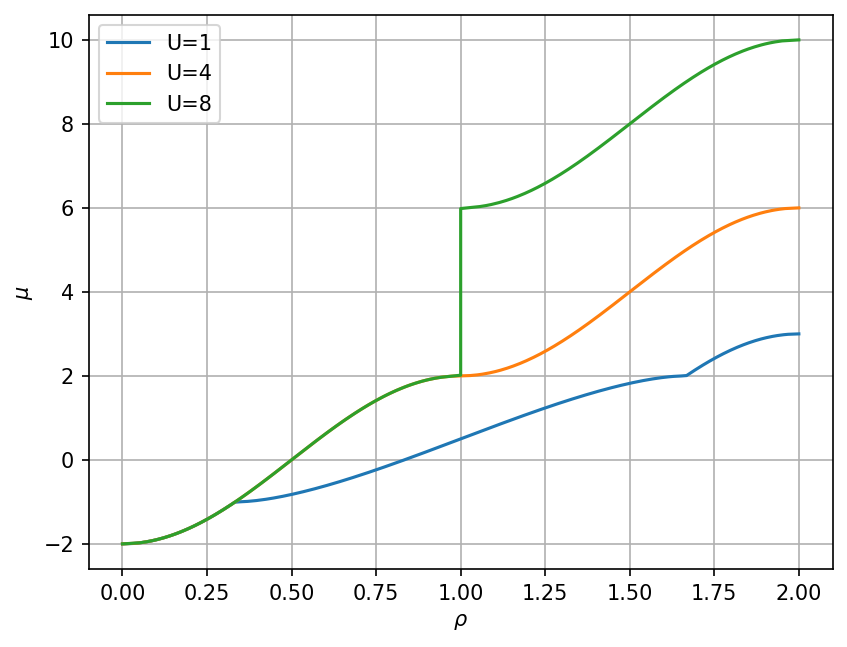

In [5]:
PlotFunctions.many_plots(labels, rhos, mus, r'$\rho$', r'$\mu$')

#### Interaction-driven Phase transition at constant density

In [9]:
import numpy as np

rho_const = 0.5
rho_string = r'$\rho$'
U_array = np.linspace(0, 5, 500)
mu_array_interaction = HK_1D.create_mu_array_interaction_driven(rho_const, U_array)

Progress: 99.8%                    

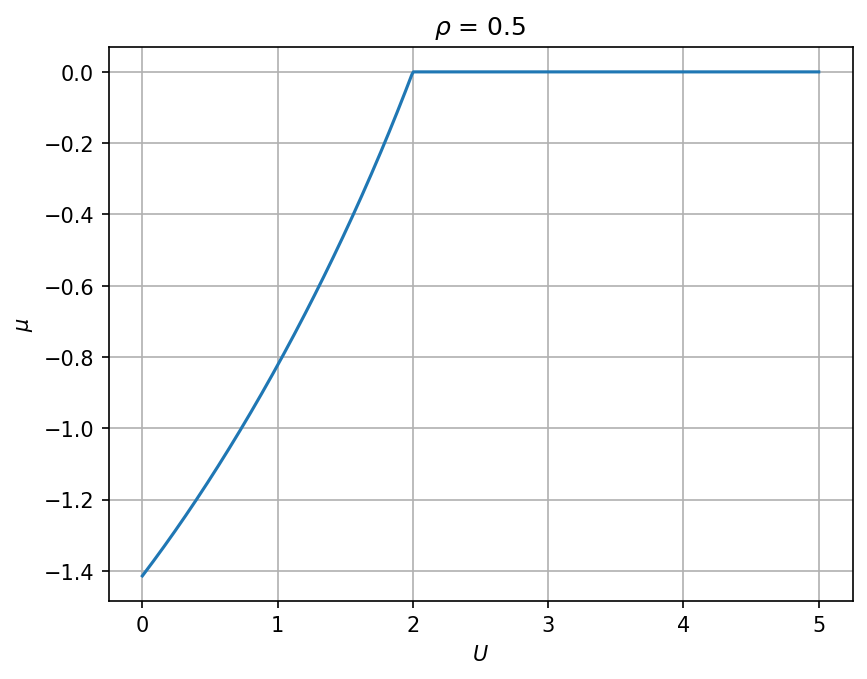

In [10]:
PlotFunctions.one_plot(U_array, mu_array_interaction, r'$U$', r'$\mu$', title=f'{rho_string} = {rho_const}')

Maybe continue with more values for density, plot them a t same time?

#### 3d-Plot

In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
U_vals = np.linspace(0, 8, N)

# build mu_grid: row i contains mu values for U = U_vals[i]
mu_grid = np.empty((N, N))
for i, U in enumerate(U_vals):
    mu_grid[i, :] = np.linspace(-2, 2 + U, N)

# build rho_grid: each row is the rho array computed for that row's mu and U
rho_grid = np.empty_like(mu_grid)
for i, U in enumerate(U_vals):
    rho_grid[i, :] = HK_1D.create_rho_array(mu_grid[i, :], U)   # shape (N,)

# build U_grid as a 2D array where each row is the constant U value
U_grid = np.repeat(U_vals[:, None], N, axis=1)   # shape (N, N)

# (Optional) mask invalid values if create_rho_array may produce NaNs
rho_grid = np.ma.masked_invalid(rho_grid)


Progress: 99.5%                    

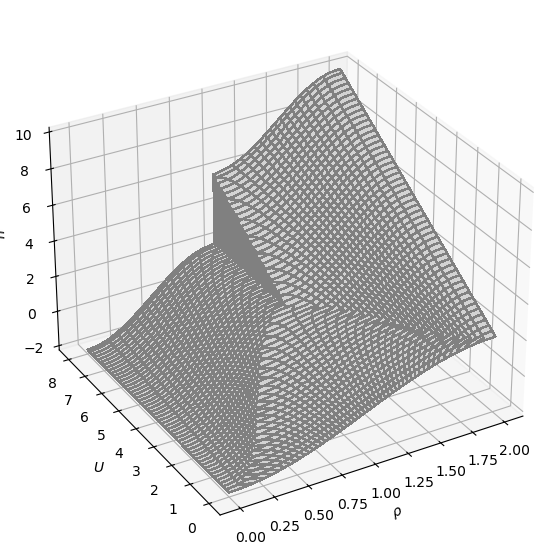

In [50]:
# --- Plot ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# X = rho, Y = U, Z = mu
surf = ax.plot_surface(rho_grid, U_grid, mu_grid,
                       color='lightgray', edgecolor='gray', antialiased=False, shade=False)


#fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12, label=r'$\mu$')

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$U$')
ax.set_zlabel(r'$\mu$')

ax.view_init(elev=30, azim=240)   # adjust viewing angle as desired
plt.show()

### 2. Compressibility

In [11]:
kappa_U1 = HK_1D.create_kappa_array(mu_U1, 1)
kappa_U4 = HK_1D.create_kappa_array(mu_U4, 4)
kappa_U8 = HK_1D.create_kappa_array(mu_U8, 8)

kappas = [kappa_U1, kappa_U4, kappa_U8]

Progress: 99.9%                    

In [ ]:
PlotFunctions.one_plot(rho_U1, kappa_U1, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U4, kappa_U4, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U8, kappa_U8, r'$\rho$', r'$\kappa$')

### 3. Energy

In [17]:
energy_U1 = HK_1D.create_energy_array(mu_U1, 1)
energy_U4 = HK_1D.create_energy_array(mu_U4, 4)
energy_U8 = HK_1D.create_energy_array(mu_U8, 8)

energies = [energy_U1, energy_U4, energy_U8]

Progress: 99.9%                    

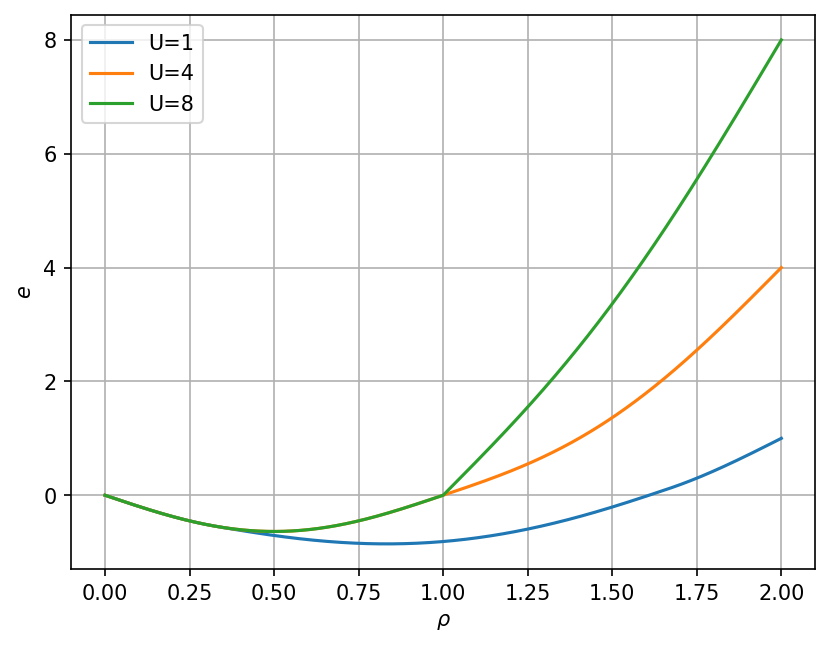

In [18]:
PlotFunctions.many_plots(labels, rhos, energies, r'$\rho$', r'$e$')

### Phase Diagram

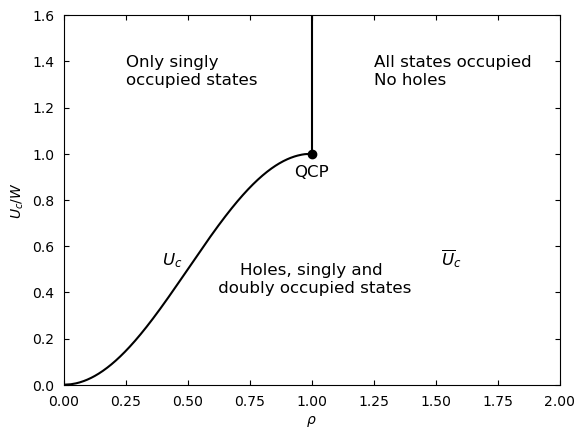

In [ ]:
from HKLnumerics import PhaseDiagram_1D
import numpy as np

rho_arr, Uc_arr = PhaseDiagram_1D.phase_diagram_hk(500)

Uc_arr_norm = Uc_arr / np.max(Uc_arr)

PlotFunctions.plot_phase_diagram(rho_arr, Uc_arr_norm, r'$\rho$', r'$U_c/W$', 1.6)

## $d=2$

In [1]:
from HKLnumerics import HK_2D, PlotFunctions
import numpy as np

str_rho = r'$\rho$'
str_mu = r'$\mu$'

In [6]:
U_one_2d = 12

mu_2d_U_one = HK_2D.create_mu_array(100, U_one_2d)

rho_2d_U_one = HK_2D.create_rho_array(mu_2d_U_one, U_one_2d)

Progress: 99.0%                    

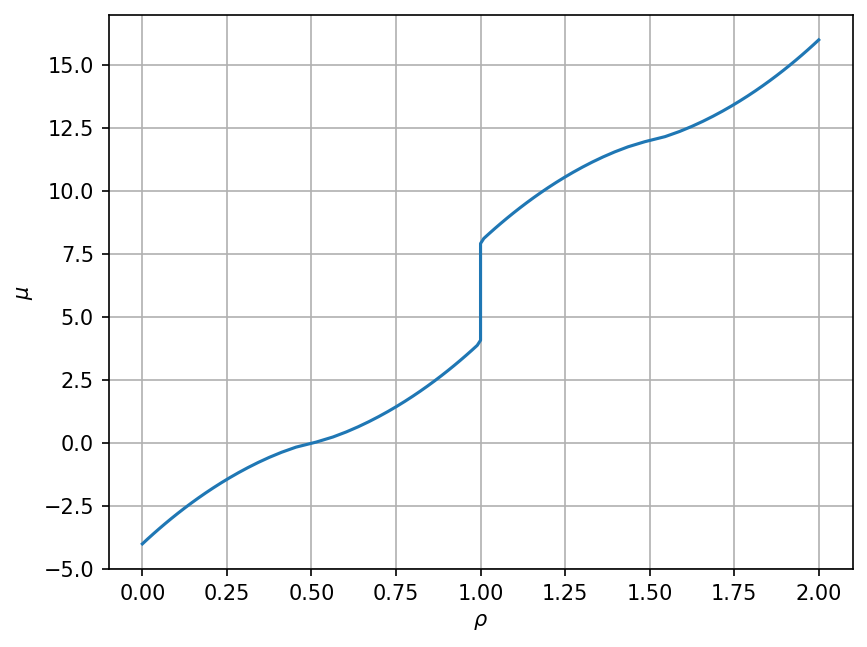

In [7]:
PlotFunctions.one_plot(rho_2d_U_one, mu_2d_U_one, str_rho, str_mu)